Kaggle link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

## Data Loading and Cleaning

In [ ]:
pip install opendatasets

{"username":"samhitha05","key":"6ea83549edccbc2e815f2a734a343bc4"}

In [ ]:
import opendatasets as od


od.download(
    "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview")

Skipping, found downloaded files in "./house-prices-advanced-regression-techniques" (use force=True to force download)


After downloading the dataset from kaggle, we observe that the train and test datasets have been split in half. The test dataset does not have the finaly y variable. So we have decided to proceed with only using the train dataset, so that we can calculate final test scores.

In [ ]:
import pandas as pd
housing_df = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')

print(housing_df.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
categorical_columns = housing_df.select_dtypes(include='object').columns.to_list()
for category in categorical_columns:
  print(housing_df[category].value_counts(dropna=False))
  print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17


In [ ]:
df = housing_df.drop(['Fence', 'PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=False)
print(df.shape)

(1460, 77)


In [ ]:
import numpy as np

#replacing nan with a column value in Garage, Fireplace and Bsmt columns
# df.GarageCond.replace({ np.nan: 'No_Garage'})
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')

print(df['GarageCond'].value_counts())
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')
df['GarageQual'] = df['GarageQual'].fillna('NoGarage')
df['GarageType'] = df['GarageType'].fillna('NoGarage')
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')

df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

# drop GarageYrBlt since it is same as the YearBuilt
df = df.drop(['GarageYrBlt'], axis=1)

GarageCond
TA          1326
NoGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: count, dtype: int64


In [ ]:
# Notice BsmtExposure has 38 NaN, while BsmtFinType1 has 37 NaN, so remove this row
df = df[~(df['BsmtExposure'].isna() & df['BsmtFinType1'].notna())]

df.loc[:, 'BsmtQual'] = df['BsmtQual'].fillna('NoBasement')
df.loc[:, 'BsmtCond'] = df['BsmtCond'].fillna('NoBasement')
df.loc[:, 'BsmtExposure'] = df['BsmtExposure'].fillna('NoBasement')
df.loc[:, 'BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBasement')
df.loc[:, 'BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBasement')
print(df['BsmtExposure'].value_counts())

BsmtExposure
No            953
Av            221
Gd            134
Mn            114
NoBasement     37
Name: count, dtype: int64


In [ ]:
#check numerical columns for nan values
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

nan_counts = numerical_cols.isna().sum()
nan_counts[nan_counts > 0]

,0
LotFrontage,259
MasVnrArea,8


In [ ]:
# drop rows with NaN in MasVnrArea
df = df.dropna(subset=['MasVnrArea'])


df['LotFrontage'].fillna(0, inplace=True)

<ipython-input-52-7899fb0788b4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(0, inplace=True)
<ipython-input-52-7899fb0788b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotFrontage'].fillna(0, inplace=True)


In [ ]:
df = df.dropna(subset=['Electrical'])

In [ ]:
print(df['MasVnrType'])

0       BrkFace
1           NaN
2       BrkFace
3           NaN
4       BrkFace
         ...   
1455        NaN
1456      Stone
1457        NaN
1458        NaN
1459        NaN
Name: MasVnrType, Length: 1450, dtype: object


<ipython-input-55-55493b0af9ea>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna('NA', inplace=True)


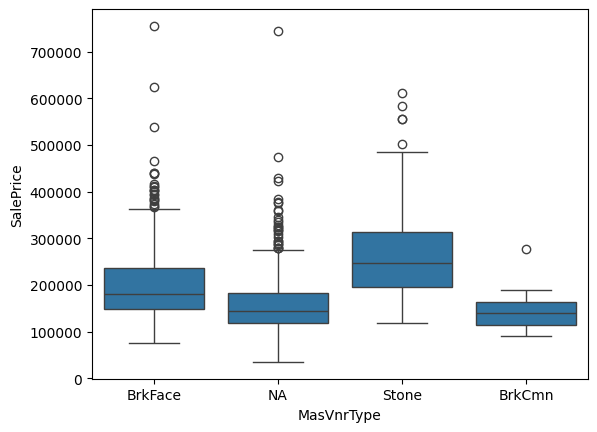

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df['MasVnrType'].fillna('NA', inplace=True)

# Plot using seaborn, including the 'missing' column
sns.boxplot(x=df['MasVnrType'], y =df['SalePrice'], data=df)
plt.show()

In [ ]:
# dropping MasVnrType column as 50% of the were missing, and no strong
# correlation was seen between the NA values and target variable

df = df.drop(['MasVnrType'], axis=1)

In [ ]:
nan_counts = df.select_dtypes(include='object').isna().sum()
print(nan_counts[nan_counts > 0])

print('Numerical')
nan_counts = df.select_dtypes(include=['float64', 'int64']).isna().sum()
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)
Numerical
Series([], dtype: int64)


In [ ]:
y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)
print(df.shape)

(1450, 75)


In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Train a MLP for house price prediction

In [ ]:
# Jasrine: train/test split (80/20)
from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.to_list()
categorical_features = X.select_dtypes(include='object').columns.to_list()
print(len(numerical_features), len(categorical_features))

36 38


In [ ]:

mlp_preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", make_pipeline(StandardScaler()), numerical_features),
        ("categorical", make_pipeline(TargetEncoder(target_type='continuous'), StandardScaler()), categorical_features),
    ]
)
mlp_preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                                  'FullBath...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])])

We have 74 input features. We design the MLP to have three hidden layers with 64, 32, 16 neurons, respectively, to gradually abstract out information from the inputs and finally pass it into the output layer.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
regr = MLPRegressor(hidden_layer_sizes=(64, 32, 16),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    random_state=0,
                    early_stopping=True,
                    tol=1e-5)

mlp = make_pipeline(mlp_preprocessor, regr)
mlp.fit(X_dev, y_dev)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'B...
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', ...])])),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=(64, 32, 16), max_iter=1000,
                              random_state=0, tol=1e-05))])

In [ ]:
print("train scroe:", mlp.score(X_dev, y_dev))
print("test score:", mlp.score(X_test, y_test))

train scroe: 0.7298967982988394
test score: 0.7508411371243573


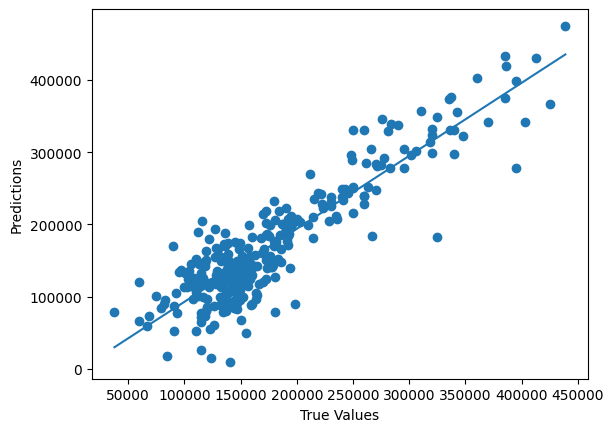

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = mlp.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

It turns out that the model can interpret 70% - 75% of the variance in the target variable.

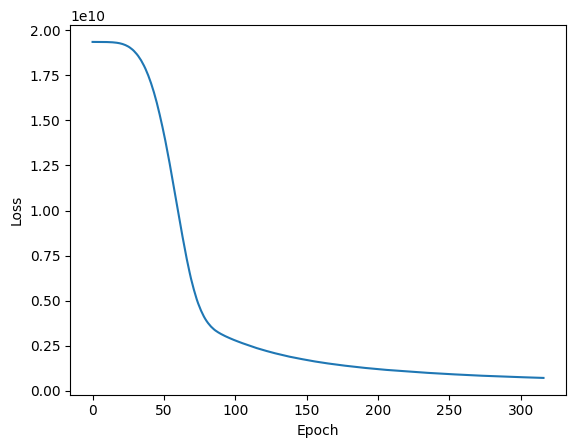

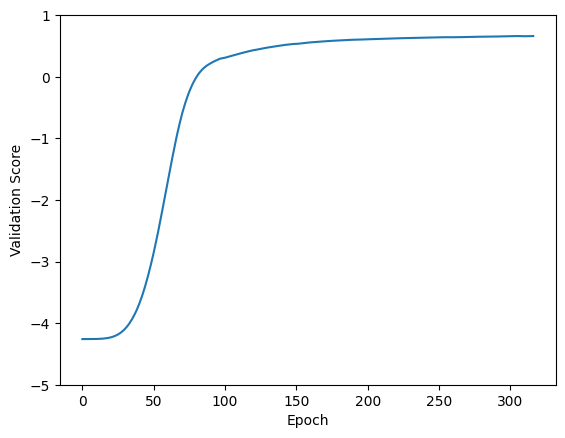

In [ ]:
# Training loss
plt.plot(regr.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Validation scores
plt.plot(regr.validation_scores_)
plt.yticks(np.arange(-5, 1.1, 1.0))
plt.xlabel('Epoch')
plt.ylabel('Validation Score')
plt.show()